# Settings

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import remixt

In [2]:
import remixt.cn_plot as cn_plot

# Data

In [3]:
class Wildcards:
    def __init__(self, sample):
        self.sample = sample

In [4]:
def _get_remixtpp_cn_path(wildcards, ignore_warnings=False):
    tb_path = '/juno/work/shah/users/chois7/tickets/remixt-pp-plot/resources/paths.WGS-REMIXT-POSTPROCESS.tsv'
    tb = pd.read_table(tb_path)
    tb = tb[tb['result_type']=='remixt_cn']
    tb = tb[tb['isabl_sample_id'] == wildcards.sample]
    if not ignore_warnings:
        assert tb.shape[0] == 1, f'tb=\n{tb}'
        path = tb['result_filepath'].iloc[0]
    else:
        if tb.shape[0] == 0:
            path = None
        else:
            path = tb['result_filepath'].iloc[0]
    return path

In [5]:
def add_legend(fig, label_colors, marker='_'):
    ax = fig.get_axes()[0]
    handle = [plt.plot([], [],
              color=label_colors[label], marker=marker, ms=4, ls="")[0] 
              for label in label_colors]
    legend = ax.legend(handles=handle, labels=label_colors.keys(), title="labels")
    legend.get_frame().set_alpha(0.4)
    ax.add_artist(legend);

In [ ]:
samples = ['HCM-BROD-0448-C15-06A']
sample = samples[0]
wildcards = Wildcards(sample)

In [ ]:
allele_cn_filename = _get_remixtpp_cn_path(wildcards)
data = pd.read_csv(allele_cn_filename, sep='\t', dtype={'chromosome': 'str'})

In [ ]:
data['chromosome'] = data['chromosome'].str.replace('chr', '')

In [ ]:
data = data.dropna()

In [ ]:
cn_path = allele_cn_filename

In [ ]:
import os
import yaml

In [ ]:
def read_purity_and_ploidy(cn_path):
    dir_path, fname = meta_path = os.path.split(cn_path)
    meta_path = f'{dir_path}/meta.yaml'
    meta = yaml.load(open(meta_path).read(), Loader=yaml.Loader)
    ploidy = meta['ploidy']
    purity = sum(meta['mix'][1:])
    return purity, ploidy

read_purity_and_ploidy(cn_path)

(0.9819824335555685, 3.261182385799281)

In [ ]:
data

,chromosome,start,end,major_is_allele_a,length,major_readcount,minor_readcount,readcount,allele_ratio,major_depth,...,minor_e,total_e,major_raw_e,minor_raw_e,major_diff,minor_diff,prob_is_outlier_total,prob_is_outlier_allele,total_likelihood_mask,allele_likelihood_mask
0,1,10000,207666,1,11257.761208,418,292,5332,0.411268,0.278841,...,230.551790,913.899194,3.0,1.0,0,0,0.010000,0.010000,0,0
1,1,257666,297968,1,1547.392445,208,54,1871,0.206107,0.959921,...,31.689613,125.616513,3.0,1.0,0,0,0.010000,0.010000,0,0
2,1,347968,500000,1,96.031523,0,0,189,0.000000,1.968104,...,1.966665,7.795789,3.0,1.0,0,0,0.010000,0.010000,0,0
3,1,500000,535988,1,148.965463,46,42,532,0.477273,1.866815,...,3.050718,12.092939,3.0,1.0,0,0,0.010000,0.010000,0,0
4,1,585988,1000000,1,205926.909448,1910,444,19177,0.188615,0.075560,...,4217.252134,16717.039297,3.0,1.0,0,0,0.057137,0.030631,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634,Y,25500000,26000000,1,551.972016,0,0,0,0.000000,0.000000,...,0.203671,0.407342,0.0,0.0,0,0,0.010000,0.010000,0,0
6635,Y,26000000,26500000,1,178758.937398,0,0,200,0.000000,0.001119,...,65.959957,131.919913,0.0,0.0,0,0,0.127147,0.010000,1,0
6636,Y,26500000,26673214,1,161160.311302,0,0,16,0.000000,0.000099,...,59.466270,118.932539,0.0,0.0,0,0,1.000000,0.010000,1,0
6637,Y,56673214,56771509,1,478.645736,0,0,0,0.000000,0.000000,...,0.176615,0.353229,0.0,0.0,0,0,0.010000,0.010000,0,0


# Plot

#### kde

In [20]:
positions

array([[-3.98217929, -3.98217929, -3.98217929, ...,  3.71982321,
         3.71982321,  3.71982321],
       [-4.33828422, -4.25207999, -4.16587575, ...,  4.02352625,
         4.10973048,  4.19593471]])

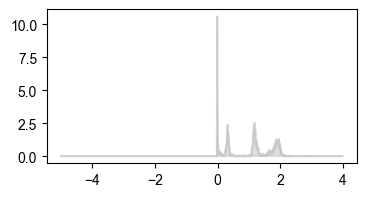

In [ ]:
fig, ax = plt.subplots(figsize=(4,2))
cn_plot.filled_density_weighted(ax, data.dropna()['minor_raw'].values, data.dropna()['length'].values, '0.75', 0.5, -5, 4, 0.001, False)

In [78]:
remixt.__file__

'/juno/work/shah/users/chois7/envs/p37/lib/python3.7/site-packages/remixt/__init__.py'

In [9]:
remixt.__file__

'/juno/work/shah/users/chois7/envs/p37/lib/python3.7/site-packages/remixt/__init__.py'

In [14]:
import numpy as np

In [15]:
major, minor, length = data.replace(np.inf, np.nan).dropna()[['major_raw', 'minor_raw', 'length']].values.T
ploidy = ((major + minor) * length).sum() / length.sum()

In [ ]:
ploidy

2.6315784435018754

In [ ]:
data['major_

,chromosome,start,end,major_is_allele_a,length,major_readcount,minor_readcount,readcount,allele_ratio,major_depth,...,minor_e,total_e,major_raw_e,minor_raw_e,major_diff,minor_diff,prob_is_outlier_total,prob_is_outlier_allele,total_likelihood_mask,allele_likelihood_mask
0,1,10000,207666,1,11066.236447,365,150,3949,0.291262,0.252914,...,309.201808,815.848709,2.586698,0.0,1,0,0.01,0.01,0,0
1,1,257666,297968,1,1527.074357,228,37,1697,0.139623,0.956116,...,42.667998,112.582236,2.586698,0.0,1,0,0.01,0.01,0,0
2,1,347968,500000,1,86.961033,12,0,295,0.000000,3.392324,...,2.429779,6.411127,2.586698,0.0,1,0,0.01,0.01,0,0
3,1,500000,535988,1,138.623660,33,31,469,0.484375,1.744494,...,3.873285,10.219909,2.586698,0.0,1,0,0.01,0.01,0,0
4,1,585988,1000000,1,200841.515783,4435,2826,27332,0.389203,0.083122,...,5611.714533,14806.867017,2.586698,0.0,1,0,0.01,0.01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,Y,25500000,26000000,1,498.912487,0,0,1315,0.000000,2.635733,...,13.940118,27.880236,0.000000,0.0,0,0,0.01,0.01,0,0
6425,Y,26000000,26500000,1,178951.795980,0,0,8310,0.000000,0.046437,...,5000.093682,10000.187364,0.000000,0.0,0,0,1.00,0.01,1,0
6426,Y,26500000,26673214,1,161237.136841,0,0,15339,0.000000,0.095133,...,4505.128238,9010.256475,0.000000,0.0,0,0,0.01,0.01,0,0
6427,Y,56673214,56771509,1,459.179532,0,0,75595,0.000000,164.630596,...,12.829939,25.659879,0.000000,0.0,0,0,0.01,0.01,0,0


Text(0.1, 0.1, '')

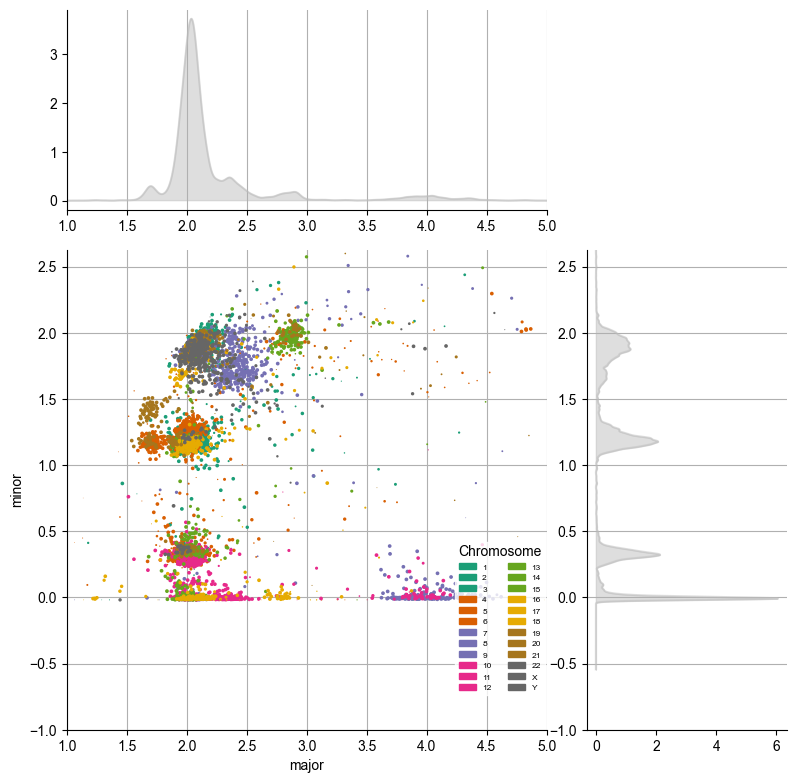

In [ ]:

fig = plt.figure(figsize=(8,8))

box = matplotlib.transforms.Bbox([[0., 0.], [1., 1.]])
transform = matplotlib.transforms.BboxTransformTo(box)
_ = cn_plot.plot_cnv_scatter_density(fig, transform, data.dropna(), major_col='major_raw', minor_col='minor_raw')

ax1, ax2, ax3, ax4 = fig.get_axes()
ax1.set_xlim((0, 5)); ax1.set_ylim((-1, None)); 
ax2.set_xlim((0, 5)); ax3.set_ylim((-1, None)); 
legend = ax1.get_legend()
legend.set_bbox_to_anchor((0.8, 0.4))
ax4.text(x=0.1, y=0.1, s=f'ploidy = 1.99\npurity = 0.21\nfraction altered = 0.99')

In [96]:
chromosomes = [str(a) for a in list(range(1, 23)) + ['X', 'Y']]

In [97]:
sample

'HCM-CSHL-0058-C34-86A'

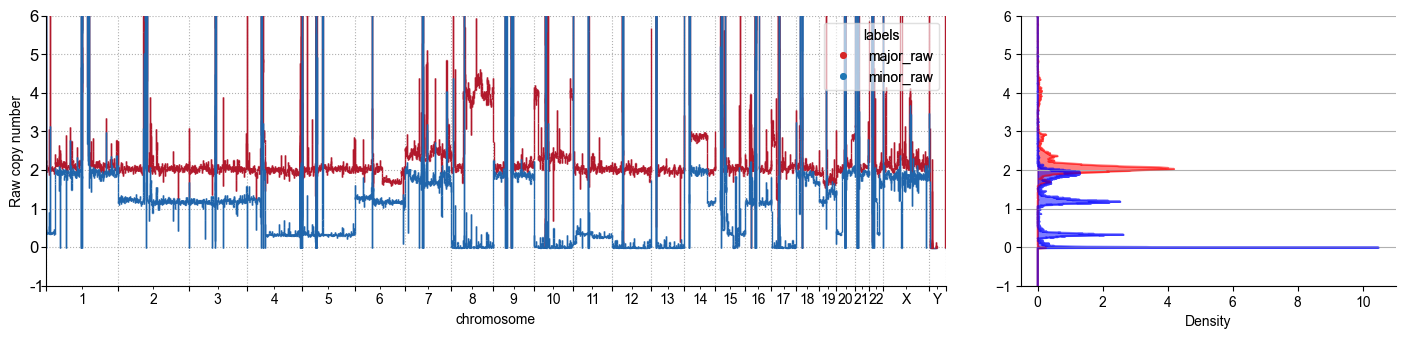

In [ ]:

fig = plt.figure(figsize=(15, 3))

box = matplotlib.transforms.Bbox([[0., 0.], [1., 1.]])
transform = matplotlib.transforms.BboxTransformTo(box)

chromosomes = [str(a) for a in list(range(1, 23)) + ['X', 'Y']]

_ = cn_plot.plot_cnv_genome_density(fig, transform, data, chromosomes=chromosomes)

label_colors = {'major_raw': 'tab:red', 'minor_raw':'tab:blue'}
add_legend(fig, label_colors, marker='o')

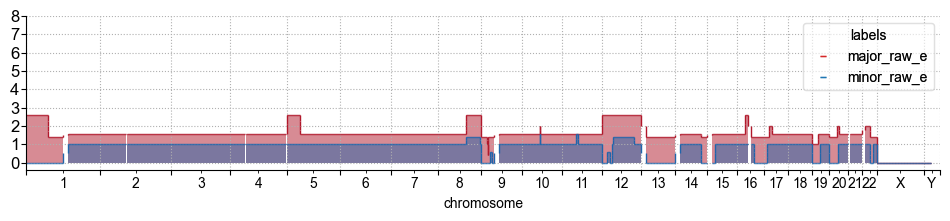

In [68]:

fig = plt.figure(figsize=(11.8, 2))

_ = remixt.cn_plot.plot_cnv_genome(
    plt.gca(), data, major_col='major_raw_e', minor_col='minor_raw_e',
    chromosomes=chromosomes, scatter=False, do_fill=True, maxcopies=8)

label_colors = {'major_raw_e': 'tab:red', 'minor_raw_e':'tab:blue'}
add_legend(fig, label_colors)

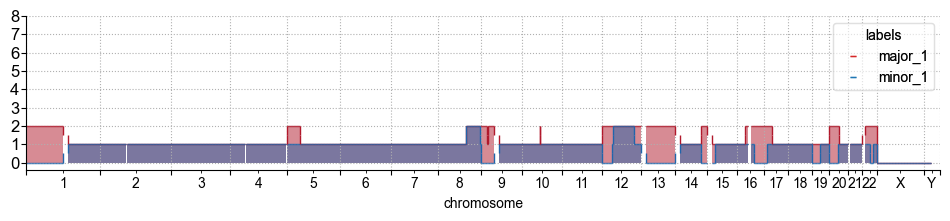

In [64]:

fig = plt.figure(figsize=(11.8, 2))

_ = remixt.cn_plot.plot_cnv_genome(
    plt.gca(), data, major_col='major_1', minor_col='minor_1',
    chromosomes=chromosomes, scatter=False, do_fill=True, maxcopies=8)

label_colors = {'major_1': 'tab:red', 'minor_1':'tab:blue'}
add_legend(fig, label_colors)

# PdfPages

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages


In [ ]:
def add_legend(fig, label_colors, marker='_'):
    ax = fig.get_axes()[0]
    handle = [plt.plot([], [],
              color=label_colors[label], marker=marker, ms=4, ls="")[0] 
              for label in label_colors]
    legend = ax.legend(handles=handle, labels=label_colors.keys(), title="labels")
    legend.get_frame().set_alpha(0.4)
    ax.add_artist(legend);

chromosomes = [str(a) for a in list(range(1, 23)) + ['X', 'Y']]

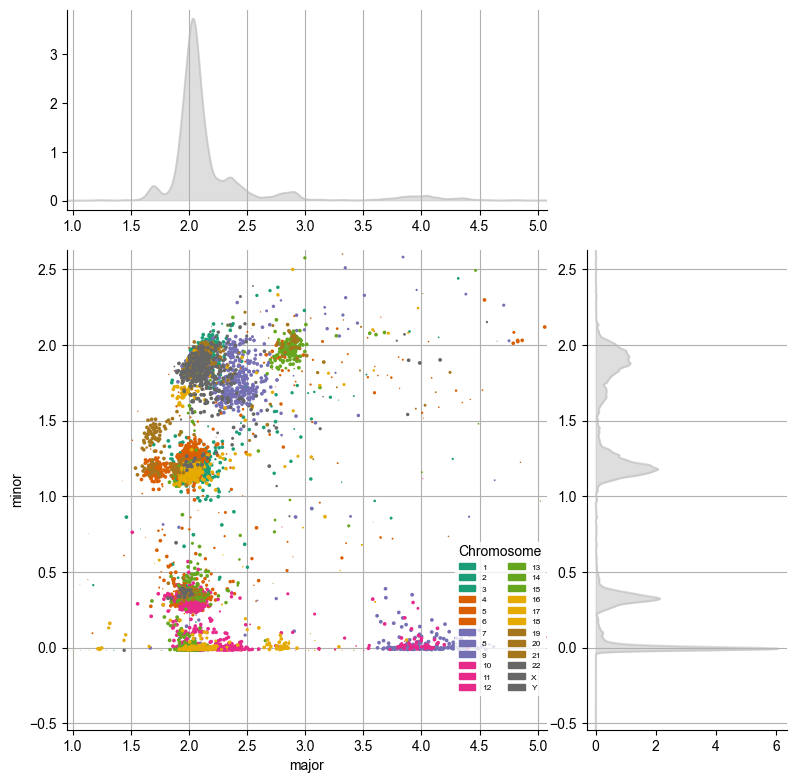

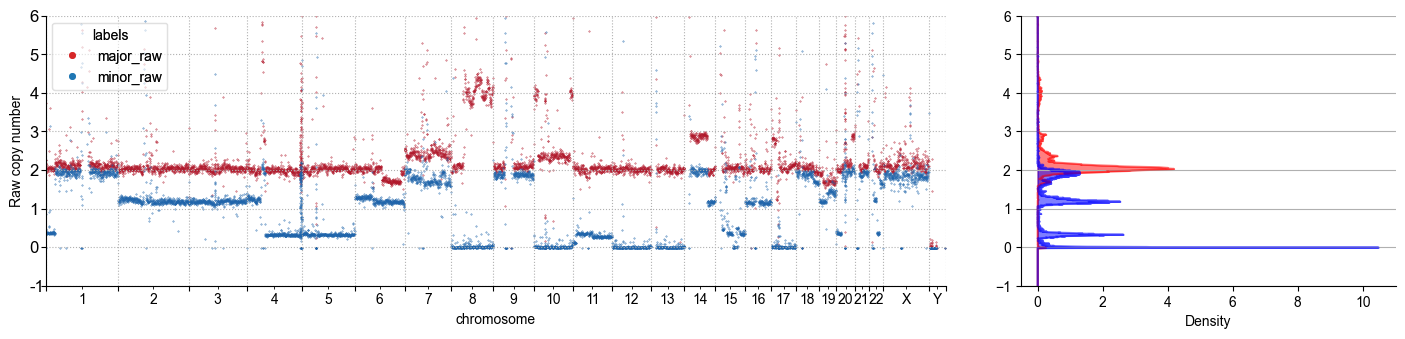

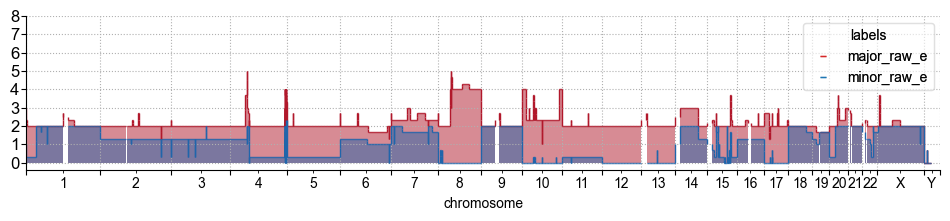

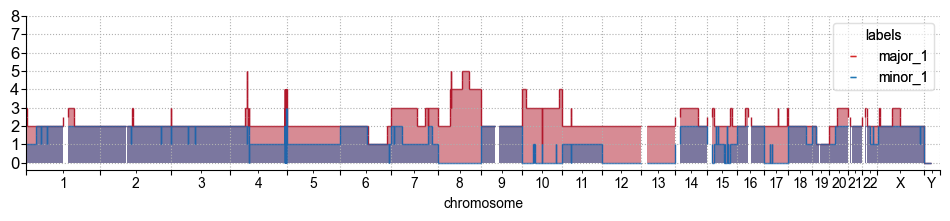

In [ ]:
p = PdfPages('test.pdf')

# fig 1
fig = plt.figure(figsize=(8,8))

box = matplotlib.transforms.Bbox([[0., 0.], [1., 1.]])
transform = matplotlib.transforms.BboxTransformTo(box)
_ = remixt.cn_plot.plot_cnv_scatter_density(fig, transform, data, major_col='major_raw', minor_col='minor_raw')

ax1, _, ax3, ax4 = fig.get_axes()
legend = ax1.get_legend()
legend.set_bbox_to_anchor((0.8, 0.4))

p.savefig(fig)


# fig 2
fig = plt.figure(figsize=(15, 3))

box = matplotlib.transforms.Bbox([[0., 0.], [1., 1.]])
transform = matplotlib.transforms.BboxTransformTo(box)

chromosomes = [str(a) for a in list(range(1, 23)) + ['X', 'Y']]

_ = remixt.cn_plot.plot_cnv_genome_density(fig, transform, data, chromosomes=chromosomes, scatter=True)

label_colors = {'major_raw': 'tab:red', 'minor_raw':'tab:blue'}
add_legend(fig, label_colors, marker='o')

p.savefig(fig)


# fig 3

fig, ax = plt.subplots(figsize=(11.8, 2))

_ = remixt.cn_plot.plot_cnv_genome(
    plt.gca(), data, major_col='major_raw_e', minor_col='minor_raw_e',
    chromosomes=chromosomes, scatter=False, do_fill=True, maxcopies=8)

label_colors = {'major_raw_e': 'tab:red', 'minor_raw_e':'tab:blue'}
add_legend(fig, label_colors)

p.savefig(fig)


# fig 4
fig, ax = plt.subplots(figsize=(11.8, 2))

_ = remixt.cn_plot.plot_cnv_genome(
    plt.gca(), data, major_col='major_1', minor_col='minor_1',
    chromosomes=chromosomes, scatter=False, do_fill=True, maxcopies=8)

label_colors = {'major_1': 'tab:red', 'minor_1':'tab:blue'}
add_legend(fig, label_colors)

p.savefig(fig)

# close
p.close()

# Calc fraction-altered

In [39]:
def calc_fraction_altered(data):
    bp_altered = data[
        (data['major_1'] != 1) |
        (data['minor_1'] != 1)
    ]['bin_size'].sum()
    total_bin_size = data['bin_size'].sum()
    fraction_altered = bp_altered / total_bin_size
    return fraction_altered

In [37]:
samples = [ # samples under scrutiny
    "HCM-BROD-0038-C41-86A",
    "HCM-BROD-0195-C71-85A",
    "HCM-BROD-0199-C71-85A",
    "HCM-BROD-0210-C71-85R",
    "HCM-BROD-0214-C71-85A",
    "HCM-BROD-0220-C15-85B",
    "HCM-BROD-0344-C25-85A",
    "HCM-BROD-0448-C15-06A",
    "HCM-BROD-0577-C15-06A",
    "HCM-BROD-0578-C15-06A",
    "HCM-BROD-0695-C71-02B",
    "HCM-CSHL-0058-C34-85C",
    "HCM-CSHL-0058-C34-86A",
    "HCM-CSHL-0081-C25-01A",
    "HCM-CSHL-0176-C25-01A",
    "HCM-CSHL-0374-C25-01A",
    "HCM-CSHL-0379-C18-85A",
    "HCM-CSHL-0459-C17-01B",
    "HCM-CSHL-0729-C18-85A",
    "HCM-CSHL-0807-C54-01A",
    "HCM-SANG-0284-C18-01A",
    "HCM-SANG-0289-C15-85A",
    "HCM-SANG-0314-C15-85A",
]

In [48]:
for sample in samples:
    wildcards = Wildcards(sample)
    cn_path = _get_remixtpp_cn_path(wildcards, ignore_warnings=True)
    if cn_path == None:
        print(sample, 'N/A', 'N/A')
        continue
    data = pd.read_csv(cn_path, sep='\t', dtype={'chromosome': 'str'})
    data['chromosome'] = data['chromosome'].str.replace('chr', '')
    data = data.dropna()
    data['bin_size'] = data['end'] - data['start']
    fraction_altered = calc_fraction_altered(data)
    print(sample, fraction_altered)

HCM-BROD-0038-C41-86A 0.8635010293462967
HCM-BROD-0195-C71-85A 0.8771818635529722
HCM-BROD-0199-C71-85A 0.23350314629952496
HCM-BROD-0210-C71-85R 0.9627960719657713
HCM-BROD-0214-C71-85A 0.9995461233848324
HCM-BROD-0220-C15-85B 1.0
HCM-BROD-0344-C25-85A 0.9502383555225774
HCM-BROD-0448-C15-06A 0.9911880328066589
HCM-BROD-0577-C15-06A 0.9475623924369012
HCM-BROD-0578-C15-06A 0.32001773328297556
HCM-BROD-0695-C71-02B 0.9514493785231574
HCM-CSHL-0058-C34-85C 1.0
HCM-CSHL-0058-C34-86A 0.3023166386797539
HCM-CSHL-0081-C25-01A 1.0
HCM-CSHL-0176-C25-01A 0.41039128010488607
HCM-CSHL-0374-C25-01A N/A N/A
HCM-CSHL-0379-C18-85A 0.9998071942967334
HCM-CSHL-0459-C17-01B 1.0
HCM-CSHL-0729-C18-85A 1.0
HCM-CSHL-0807-C54-01A 0.9127043587729567
HCM-SANG-0284-C18-01A 1.0
HCM-SANG-0289-C15-85A 0.9739850062985279
HCM-SANG-0314-C15-85A 0.9935049987385178


In [15]:
fraction_altered = {
    "HCM-BROD-0038-C41-86A": 0.8635010293462967,
    "HCM-BROD-0195-C71-85A": 0.8771818635529722,
    "HCM-BROD-0199-C71-85A": 0.23350314629952496,
    "HCM-BROD-0210-C71-85R": 0.9627960719657713,
    "HCM-BROD-0214-C71-85A": 0.9995461233848324,
    "HCM-BROD-0220-C15-85B": 1.0,
    "HCM-BROD-0344-C25-85A": 0.9502383555225774,
    "HCM-BROD-0448-C15-06A": 0.9911880328066589,
    "HCM-BROD-0577-C15-06A": 0.9475623924369012,
    "HCM-BROD-0578-C15-06A": 0.32001773328297556,
    "HCM-BROD-0695-C71-02B": 0.9514493785231574,
    "HCM-CSHL-0058-C34-85C": 1.0,
    "HCM-CSHL-0058-C34-86A": 0.3023166386797539,
    "HCM-CSHL-0081-C25-01A": 1.0,
    "HCM-CSHL-0176-C25-01A": 0.41039128010488607,
    "HCM-CSHL-0374-C25-01A": "N/A",
    "HCM-CSHL-0379-C18-85A": 0.9998071942967334,
    "HCM-CSHL-0459-C17-01B": 1.0,
    "HCM-CSHL-0729-C18-85A": 1.0,
    "HCM-CSHL-0807-C54-01A": 0.9127043587729567,
    "HCM-SANG-0284-C18-01A": 1.0,
    "HCM-SANG-0289-C15-85A": 0.9739850062985279,
    "HCM-SANG-0314-C15-85A": 0.9935049987385178,
}

In [16]:
samples = [
    "HCM-BROD-0038-C41-86A",
    "HCM-BROD-0195-C71-85A",
    "HCM-BROD-0199-C71-85A",
    "HCM-BROD-0210-C71-85R",
    "HCM-BROD-0214-C71-85A",
    "HCM-BROD-0220-C15-85B",
    "HCM-BROD-0344-C25-85A",
    "HCM-BROD-0448-C15-06A",
    "HCM-BROD-0577-C15-06A",
    "HCM-BROD-0578-C15-06A",
    "HCM-BROD-0695-C71-02B",
    "HCM-CSHL-0058-C34-85C",
    "HCM-CSHL-0058-C34-86A",
    "HCM-CSHL-0081-C25-01A",
    "HCM-CSHL-0176-C25-01A",
    "HCM-CSHL-0374-C25-01A",
    "HCM-CSHL-0379-C18-85A",
    "HCM-CSHL-0459-C17-01B",
    "HCM-CSHL-0729-C18-85A",
    "HCM-CSHL-0807-C54-01A",
    "HCM-SANG-0284-C18-01A",
    "HCM-SANG-0289-C15-85A",
    "HCM-SANG-0314-C15-85A",
]

In [17]:
for sample in samples:
    print(f'{sample} {fraction_altered[sample]}')

HCM-BROD-0038-C41-86A 0.8635010293462967
HCM-BROD-0195-C71-85A 0.8771818635529722
HCM-BROD-0199-C71-85A 0.23350314629952496
HCM-BROD-0210-C71-85R 0.9627960719657713
HCM-BROD-0214-C71-85A 0.9995461233848324
HCM-BROD-0220-C15-85B 1.0
HCM-BROD-0344-C25-85A 0.9502383555225774
HCM-BROD-0448-C15-06A 0.9911880328066589
HCM-BROD-0577-C15-06A 0.9475623924369012
HCM-BROD-0578-C15-06A 0.32001773328297556
HCM-BROD-0695-C71-02B 0.9514493785231574
HCM-CSHL-0058-C34-85C 1.0
HCM-CSHL-0058-C34-86A 0.3023166386797539
HCM-CSHL-0081-C25-01A 1.0
HCM-CSHL-0176-C25-01A 0.41039128010488607
HCM-CSHL-0374-C25-01A N/A
HCM-CSHL-0379-C18-85A 0.9998071942967334
HCM-CSHL-0459-C17-01B 1.0
HCM-CSHL-0729-C18-85A 1.0
HCM-CSHL-0807-C54-01A 0.9127043587729567
HCM-SANG-0284-C18-01A 1.0
HCM-SANG-0289-C15-85A 0.9739850062985279
HCM-SANG-0314-C15-85A 0.9935049987385178


In [33]:
data['bin_size'].sum()

2923788012

In [29]:
import wgs_analysis.refgenome

In [30]:
wgs_analysis.refgenome.set_genome_version('hg38')

In [32]:
wgs_analysis.refgenome.info.chromosome_lengths.sum()

3088269832

In [49]:
import shahlabdata.isabl 